<a href="https://colab.research.google.com/github/llpk79/DS-Unit-2-Regression-1/blob/master/Paul_K_Sprint_Challenge_6_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science, Unit 2_
 
# Regression 1 Sprint Challenge

Your Sprint Challenge has two parts.

To demonstrate mastery on each part, do all the required, numbered instructions. 

To earn a score of "3" for the part, also do the stretch goals.

## Part 1. Predict avocado sales 🥑

For part 1 of your challenge, you'll use historical data on avocado sales across the nation!

Run this code cell to load the dataset. It has weekly sales volume (total number of avocados sold) from January 4, 2015 through March 25, 2018. The data comes directly from retailers' cash registers based on actual retail sales of Hass avocados in multiple US markets.

In [0]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from fbprophet.diagnostics import cross_validation, performance_metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae, r2_score as r2, mean_squared_error as mse
from sklearn.linear_model import LinearRegression

avocado_url = 'https://drive.google.com/uc?export=download&id=1ljE-LhCA9CCFvSIJYJ1ewX8JmdDpfuhi'
avocado = pd.read_csv(avocado_url)
assert avocado.shape == (169, 2)

In [2]:
avocado.columns = ['ds', 'y']
avocado.tail()

,ds,y
164,2018-02-25,109231389
165,2018-03-04,111844876
166,2018-03-11,111465145
167,2018-03-18,113673928
168,2018-03-25,118268903


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 8 forecasts with cutoffs between 2017-02-13 00:00:00 and 2017-12-25 00:00:00


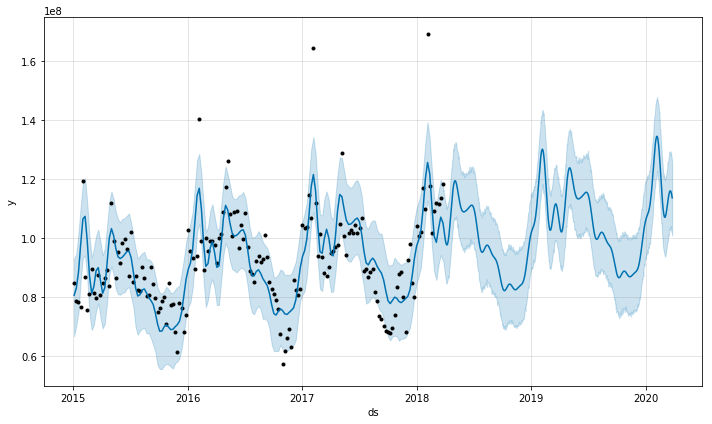

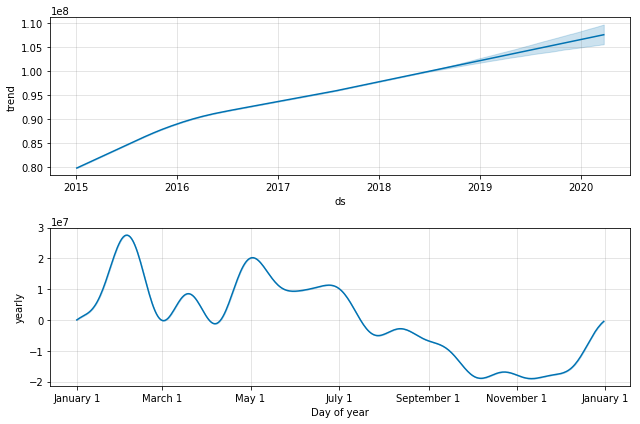

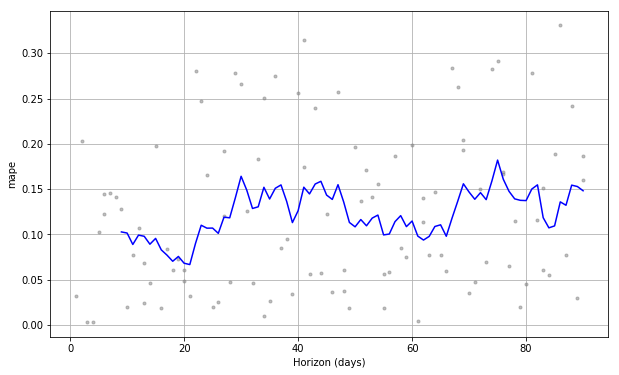

In [3]:
model = Prophet()
model.fit(avocado)

# 731 days from end of data to march 25 2020.
future = model.make_future_dataframe(periods=731)
forecast = model.predict(future)

fig_0 = model.plot(forecast)
fig_1 = model.plot_components(forecast)

avocado_cv = cross_validation(model, horizon='90 days', period='45 days', initial='730 days')
fig_2 = plot_cross_validation_metric(avocado_cv, metric='mape')

### Required

#### Use the Prophet library to:
1. Fit a model and forecast avocado sales through March 25, 2020
2. Plot the forecast
3. Plot the forecast components
4. Do time series cross-validation, with these parameters: `horizon='90 days', period='45 days', initial='730 days'`
5. Plot the cross-validation Mean Absolute Percentage Error: `metric='mape'`

_For Part 1 of this Sprint Challenge, you are **not** required to calculate or plot baselines, or do train/test split._

You can be confident you've done it correctly when your plots look similar to these:

<img src="https://i.imgur.com/PoyVGp7.png" width="400" align="left">



### Stretch Goal
- Adjust your forecasts with Prophet's options for changepoints, holidays, and fourier order. Improve the cross-validation MAPE.

INFO:fbprophet:Making 8 forecasts with cutoffs between 2017-02-13 00:00:00 and 2017-12-25 00:00:00


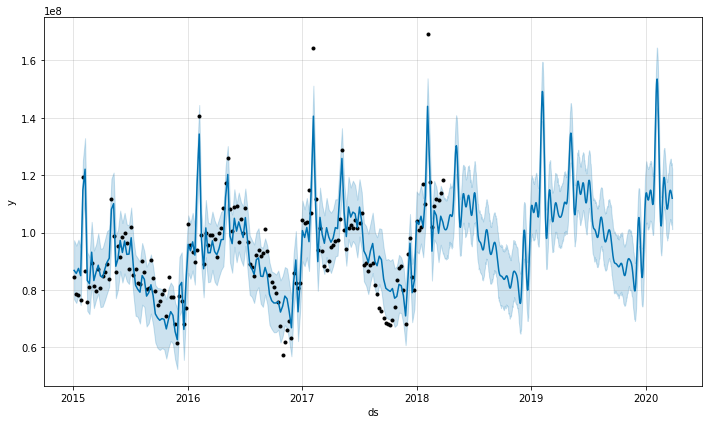

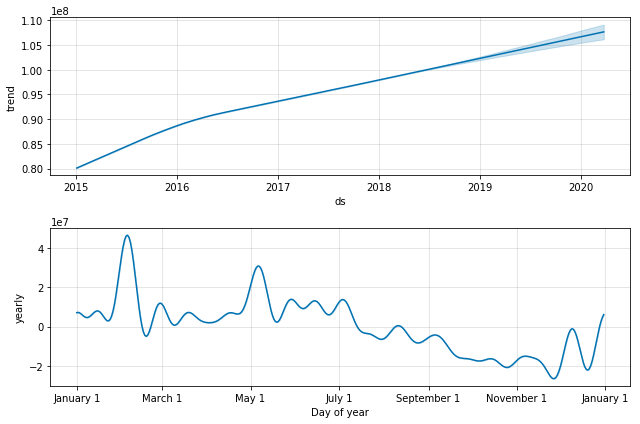

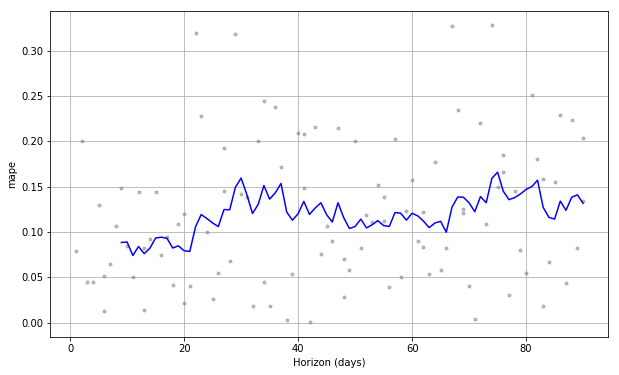

In [4]:
model = Prophet(daily_seasonality=False,
                yearly_seasonality=20,
                weekly_seasonality=False,
                changepoint_prior_scale=0.025)
model.fit(avocado)
future = model.make_future_dataframe(periods=731)

forecast = model.predict(future)

fig_0 = model.plot(forecast)
fig_1 = model.plot_components(forecast)

avocado_cv = cross_validation(model, horizon='90 days', period='45 days', initial='730 days')
fig_2 = plot_cross_validation_metric(avocado_cv, metric='mape')

Just eyeballing it looks to be better than above. Just a couple peaks over 0.15.

## Part 2. Predict NYC apartment rent 🏠💸

For part 1 of your challenge, you'll use a real-world data with rent prices for a subset of apartments in New York City!

Run this code cell to load the dataset: 

In [0]:
rent_url = 'https://drive.google.com/uc?export=download&id=1lVVPmh-WYGb_0Gs_lOv22i02-150qDdZ'
rent = pd.read_csv(rent_url)
assert rent.shape == (48295, 7)

In [6]:
rent.head()

,year,month,bedrooms,bathrooms,latitude,longitude,price
0,2016,6,3,1.5,40.7145,-73.9425,3000
1,2016,6,2,1.0,40.7947,-73.9667,5465
2,2016,4,1,1.0,40.7388,-74.0018,2850
3,2016,4,1,1.0,40.7539,-73.9677,3275
4,2016,4,4,1.0,40.8241,-73.9493,3350


In [0]:
rent['mean base'] = rent['price'].mean()

In [8]:
mean_error = mae(rent['price'], rent['mean base'])
r2_error = r2(rent['price'], rent['mean base'])

print(f'MAE for Mean Baseline Rent: {mean_error}')
print(f'R2 Score for Mean Baseline Rent {r2_error}')

MAE for Mean Baseline Rent: 1055.7857771080928
R2 Score for Mean Baseline Rent 0.0


In [0]:
train = rent[(rent['month'] == 4) | (rent['month'] == 5)]
test = rent[rent['month'] == 6]

In [10]:
features = ['bedrooms', 'latitude']
label = 'price'

model_1 = LinearRegression()
model_1.fit(train[features], train[label])

predicted = model_1.predict(test[features])

maes = mae(test[label], predicted)
r2s = r2(test[label], predicted)
rmse = mse(test[label], predicted)**0.5

print(f'MAE for two feature regression: {maes}\nR2 Score for two feature regression {r2s}')
print(f'Model intercept {model_1.intercept_}\nModel coefficients: {model_1.coef_[0], model_1.coef_[1]}')
print(f'RMSE for two feature regression: {rmse}')

MAE for two feature regression: 857.7191386483169
R2 Score for two feature regression 0.2984588794462181
Model intercept 114026.77918031704
Model coefficients: (725.3730484549097, -2740.622878813896)
RMSE for two feature regression: 1177.5674319866473


### Required
1. Begin with baselines for regression. Calculate the mean absolute error and $R^2$ score for a mean baseline. _(You can use the whole dataset, or a test set, either way is okay here!)_
2. Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
3. Choose any two features.
4. Use scikit-learn to fit a Linear Regression model on the train data.
5. Apply the model to predict rent prices for the test data.
6. Get regression metrics MAE and $R^2$ for the test data.
7. Get the model's coefficients and intercept.

### Stretch Goals
- Try at least 3 different feature combinations. (You don't have to use two features, you can choose any number of features.)
- Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.

In [11]:
features = ['bedrooms', 'bathrooms', 'latitude', 'longitude']
model_2 = LinearRegression()
model_2.fit(train[features], train[label])

predicted = model_2.predict(test[features])

maes = mae(test[label], predicted)
r2s = r2(test[label], predicted)
rmse = mse(test[label], predicted)**0.5

print('Test set metrics:')
print(f'MAE for four feature regression: {maes}\nR2 Score for four feature regression: {r2s}')
print(f'Model intercept: {model_2.intercept_}\nModel coefficients: {model_2.coef_[0], model_2.coef_[1]}')
print(f'RMSE for four feature regression: {rmse}')

predicted = model_2.predict(train[features])

maes = mae(train[label], predicted)
r2s = r2(train[label], predicted)
rmse = mse(train[label], predicted)**0.5

print('\nTrain set metrics')
print(f'MAE for four feature regression: {maes}\nR2 Score for four feature regression: {r2s}')
print(f'Model intercept: {model_2.intercept_}\nModel coefficients: {model_2.coef_[0], model_2.coef_[1]}')
print(f'RMSE for four feature regression: {rmse}')


Test set metrics:
MAE for four feature regression: 667.6543093383528
R2 Score for four feature regression: 0.5637948359714793
Model intercept: -1206267.6492027456
Model coefficients: (453.46320548860314, 1462.4814475618905)
RMSE for four feature regression: 928.5485606974506

Train set metrics
MAE for four feature regression: 651.3045731294701
R2 Score for four feature regression: 0.5860641914447708
Model intercept: -1206267.6492027456
Model coefficients: (453.46320548860314, 1462.4814475618905)
RMSE for four feature regression: 899.6545615767893
